#Importo le librerie e i pacchetti necessari

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Definisco alcune funzioni

In [ ]:
def final_plot(data, final, mod, color):
  plt.figure(figsize=(25, 5))
  plt.title('Prediction with {} model' .format(mod))
  plt.plot(data['Value'], color='dimgrey')
  plt.plot(final[mod], color=color, alpha=0.7)
  plt.ylabel('Value')
  plt.show()

#Importo i dati

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/MAGISTRALE/2 anno/1 semestre/streaming data management/progetto')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('data_complete.csv', sep=',', header=0, low_memory=False, parse_dates=['Date_Hour'])
data.set_index('Date_Hour', inplace=True)

ARIMA=pd.read_csv('ARIMA.csv', parse_dates=['Date'])
ARIMA.set_index('Unnamed: 0', inplace=True)

UCM=pd.read_csv('UCM.csv', parse_dates=['Date'])
UCM.set_index('Unnamed: 0', inplace=True)

TBATS=pd.read_csv('TBATS.csv', parse_dates=['Date'])
TBATS.set_index('Unnamed: 0', inplace=True)

prophet=pd.read_csv('prophet.csv', parse_dates=['Date'])
prophet.set_index('Unnamed: 0', inplace=True)

LSTM=pd.read_csv('LSTM.csv', parse_dates=['Date'])
LSTM.set_index('Unnamed: 0', inplace=True)

# Previsioni

In [ ]:
final=prophet.merge(ARIMA).merge(UCM).merge(TBATS).merge(LSTM)
final.set_index('Date', inplace=True)

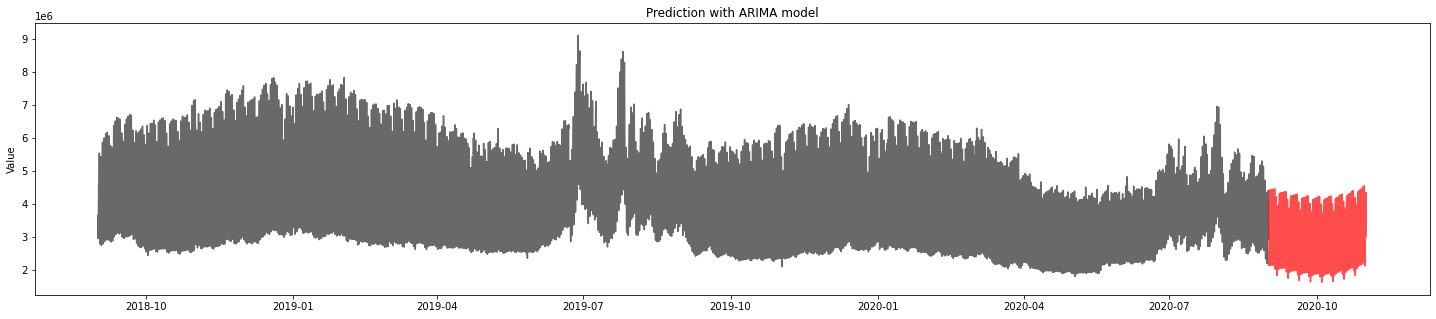

In [ ]:
#plot ARIMA
final_plot(data, final, 'ARIMA', 'red')

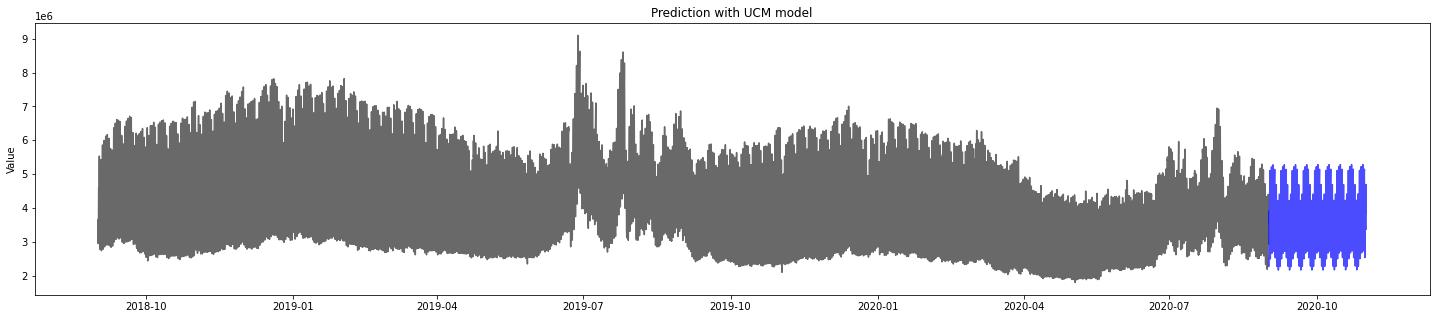

In [ ]:
#plot UCM
final_plot(data, final, 'UCM', 'blue')

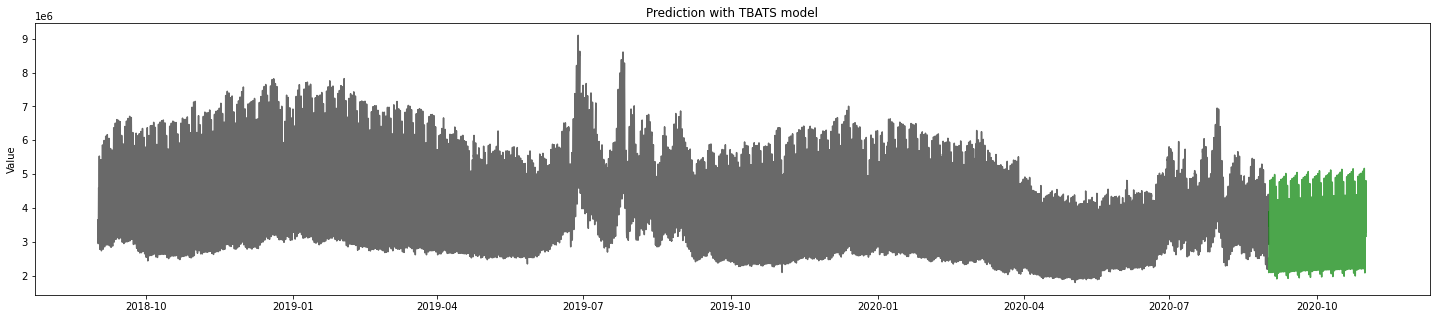

In [ ]:
#plot TBATS
final_plot(data, final, 'TBATS', 'green')

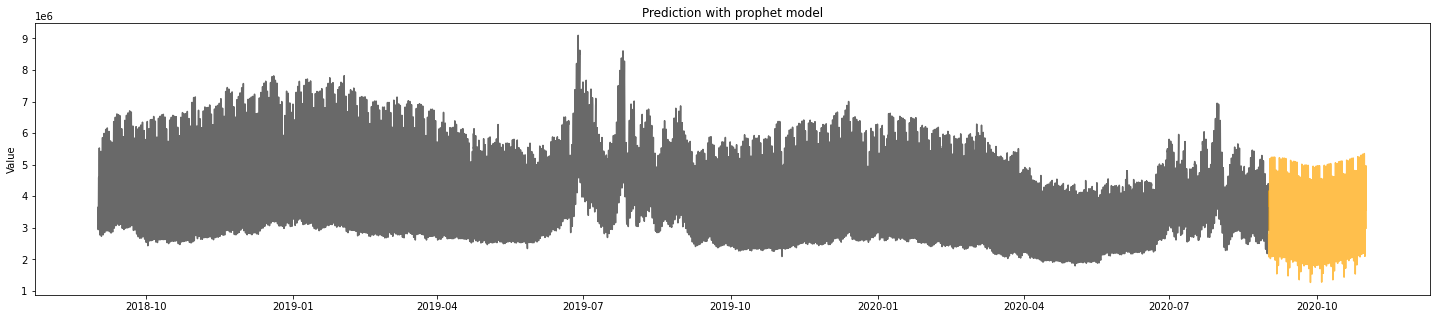

In [ ]:
#plot prophet
final_plot(data, final, 'prophet', 'orange')

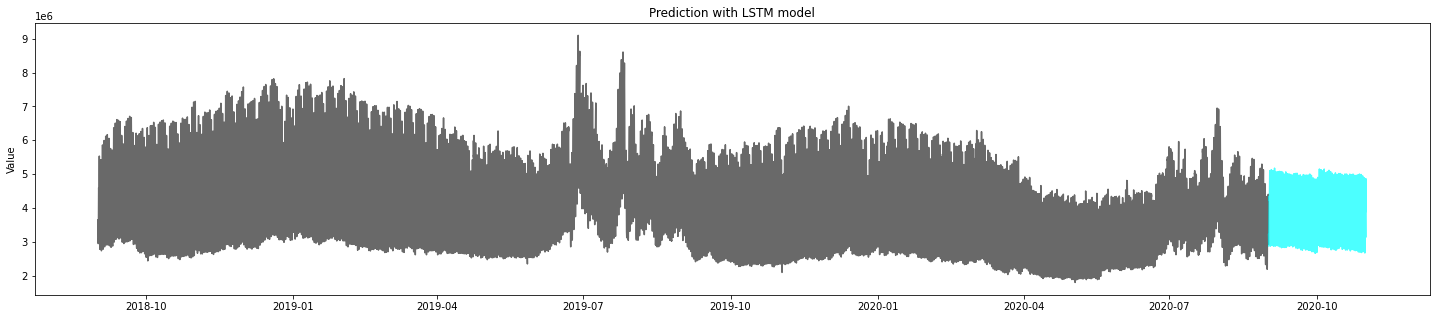

In [ ]:
#plot LSTM
final_plot(data, final, 'LSTM', 'aqua')

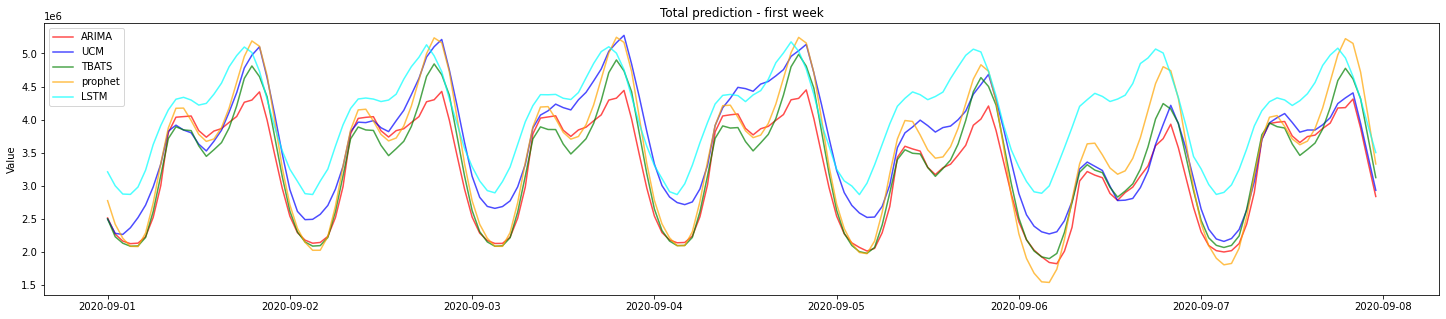

In [ ]:
#total plot 
plt.figure(figsize=(25, 5))
plt.title('Total prediction - first week')
plt.plot(final['ARIMA'][:168], color='red', label='ARIMA', alpha=0.7)
plt.plot(final['UCM'][:168], color='blue', label='UCM', alpha=0.7)
plt.plot(final['TBATS'][:168], color='green', label='TBATS', alpha=0.7)
plt.plot(final['prophet'][:168], color='orange', label='prophet', alpha=0.7)
plt.plot(final['LSTM'][:168], color='aqua', label='LSTM', alpha=0.7)
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()

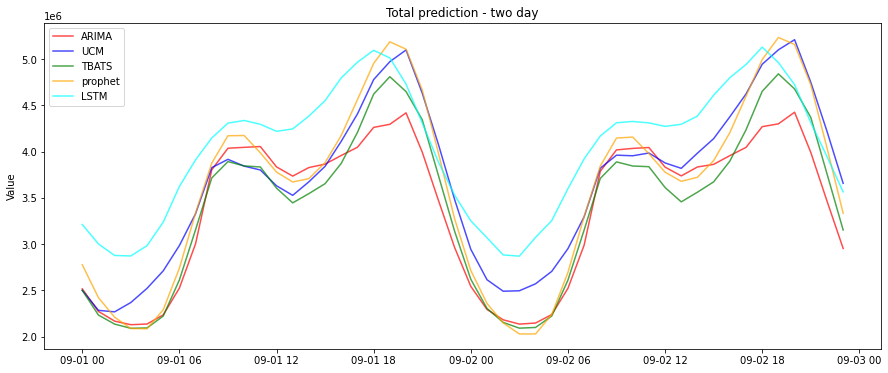

In [ ]:
#total plot 
plt.figure(figsize=(15, 6))
plt.title('Total prediction - two day')
plt.plot(final['ARIMA'][:48], color='red', label='ARIMA', alpha=0.7)
plt.plot(final['UCM'][:48], color='blue', label='UCM', alpha=0.7)
plt.plot(final['TBATS'][:48], color='green', label='TBATS', alpha=0.7)
plt.plot(final['prophet'][:48], color='orange', label='prophet', alpha=0.7)
plt.plot(final['LSTM'][:48], color='aqua', label='LSTM', alpha=0.7)
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()

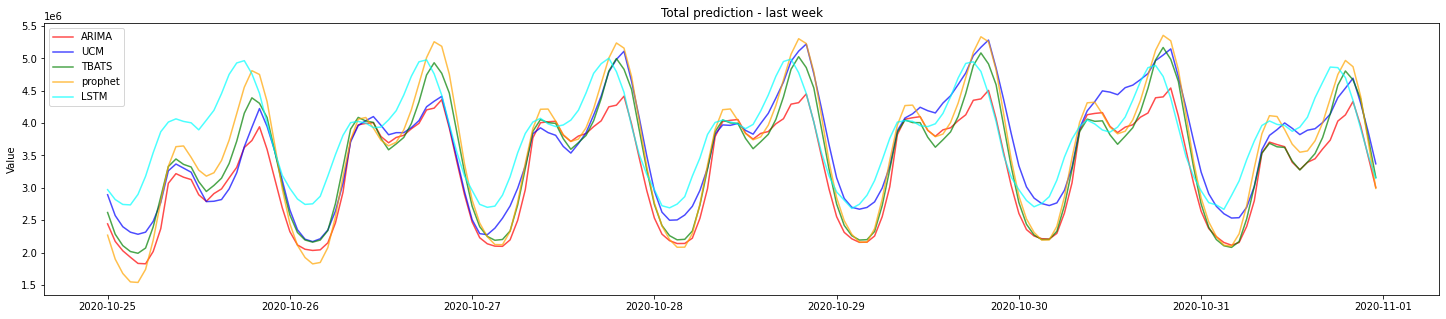

In [ ]:
#total plot 
plt.figure(figsize=(25, 5))
plt.title('Total prediction - last week')
plt.plot(final['ARIMA'][-168:], color='red', label='ARIMA', alpha=0.7)
plt.plot(final['UCM'][-168:], color='blue', label='UCM', alpha=0.7)
plt.plot(final['TBATS'][-168:], color='green', label='TBATS', alpha=0.7)
plt.plot(final['prophet'][-168:], color='orange', label='prophet', alpha=0.7)
plt.plot(final['LSTM'][-168:], color='aqua', label='LSTM', alpha=0.7)
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()

# Costruisco il file previsione

In [ ]:
submission=final.copy(deep=True)
submission['Data']=pd.to_datetime(submission.index.year.astype('str')+'-'+submission.index.month.astype('str')+'-'+submission.index.day.astype('str'),  format = "%Y-%m-%d" )
submission['Ora']=submission.index.hour
submission['Ora']=submission['Ora']+1
submission['Ora']=submission['Ora'].astype(str)

In [ ]:
#I rearrange the columns
submission.rename(columns={"LSTM": "ML"}, inplace=True)
submission = submission[['Data', 'Ora', 'ARIMA',  'UCM', 'ML']]

In [ ]:
#save to csv file
submission.to_csv('SDMTSA_864000_1.csv', sep=';', index=False)